In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

#je créer une premiere version des fonctions distances .
#il manque celle sur les types de personnes pcq il faut voir quel profile va avec le quel.

In [48]:
def creation(nb_pers):
    j =0
    res = []
    while j < nb_pers:
        res.append([])
        j += 1
   
    return res

In [49]:
def age():
    return random.randint(18, 60)

In [50]:
def generation_travail(): #probleme on peut avoir des gens de 50 ans classés en étudiant 
                          #dans la deuxième version-> rajouter des if en fct de l'age
    a=random.random()
    if age() < 29:
        if a<0.44:
            return "travaille"
        elif a<0.66:
            return "etudiant"
        else:
            return "chomage" #%pris injep.fr
        
    else:
        if a < 0.07:
            return "chomage"
        elif a < 0.95:
            return "travaille"
        else:
            return "etudiant"

In [51]:
def nb_relation():
    if age() <= 25: #conditionne le nb de relations passée en fonction de l'age pour se rapprocher de la realité
        return random.randint(0, 6)
    else:
        a = random.random() # permet d'avoir peu de personnes avec peu de relation ou bcp trop
        if a < 0.2:
            return random.randint(1, 3)
        elif a > 0.9:
            return random.randint(10, 30)
        else :
            return random.randint(3, 9)

In [52]:
def moyenne():
    a = age()    
    calcul = random.randint(3, (a * 12)-180) #choisi un nb de mois jusqu'à age moins 15ans pour se rapprocher du réel
    temps_tot = nb_relation() * calcul
    if nb_relation() == 0:
        return 0
    else :
        while temps_tot > (a * 12)-180:
            calcul = random.randint(3, (a * 12)-180)
            temps_tot = temps_tot = nb_relation() * calcul
        return calcul
        
# On peut rajouter des conditions pour que la durée moyenne soit cohérente avec l'age et le nb de relation

In [53]:
def envies():         # il faut revoir les if pour avoir des volontés plus proches de la vraie vie
    a = random.random() 
    if age() < 25:
        if a < 0.2:
            return "Q"
        elif a < 0.8:
            return "a voir"
        else :
            return "serieux"
    elif age() < 45:
        if a < 0.2:
            return "Q"
        elif a < 0.6:
            return "a voir"
        else :
            return "serieux"
    else:
        if a < 0.4:
            return "Q"
        elif a < 0.6:
            return "a voir"
        else :
            return "serieux"

In [54]:
def caract():#chacun des chiffre représente un caractère "type" qu'on peut retrouver dans le MBTI
    return random.randint(1, 4)  #les analystes, les aventuriers, les diplomates et les sentinelles

In [55]:
#il faudra une fonction qui remplace les valeurs de creation par les criteres définis par les fonctions
def vraie_liste(nb_pers):
    a = 0
    l = creation(nb_pers)
    res = []
    for a in range(len(l)):
        l[a].append(age())
        l[a].append(generation_travail())
        l[a].append(nb_relation())
        l[a].append(moyenne())
        l[a].append(envies())
        l[a].append(caract())
        
    return l

In [56]:
def meeting(): 
    f = vraie_liste(10)
    a = f[random.randint(0, len(f)-1)]    
    b = f[random.randint(0, len(f)-1)]
    while b == a:                     #b peut avoir les mêmes valeurs que a mais il ne faut pas que ce soit la même personne
        b = f[random.randint(0, len(f)-1)]
    return a, b
    

In [57]:
def dist_age(f,h): 
    
    temp = ((f[0])-(h[0]))**2
    res = math.sqrt(temp)
    return res#*12               #voir s'il faut faire en mois ou année
    

In [58]:
dist_age([24, 'travaille', 9, 83, 'a voir', 4], [23, 'travaille', 7, 39, 'serieux', 4])

1.0

In [59]:
def dist_nb_relation(f,h): 
    
    temp = ((f[2])-(h[2]))**2
    res = math.sqrt(temp)
    return res

In [60]:
dist_nb_relation([24, 'travaille', 9, 83, 'a voir', 4], [23, 'travaille', 7, 39, 'serieux', 4])

2.0

In [61]:
def dist_moyenne(f,h): 
    temp = ((f[3])-(h[3]))**2
    res = math.sqrt(temp)
    return res

In [62]:
dist_moyenne([45, 'travaille', 13, 7, 'Q', 3], [36, 'travaille', 7, 57, 'serieux', 1])

50.0

In [63]:
def dist_envie(f,h):     #il faut voir quelle ponderation mettre selon la distance des fonctions definies par des chiffres
    
    if f[4] == h[4]:
        res = 0
    elif f[4] == "Q":
        if h[4] == "serieux":
            res = 50
        else:
            res = 20
    elif f[4] == "serieux":
        if h[4] == "Q":
            res = 50
        else:
            res = 20
    else:
        res = 20
    return res
        

In [64]:
dist_envie([45, 'travaille', 13, 7, 'Q', 3], [36, 'travaille', 7, 57, 'serieux', 1])

50

In [65]:
def dist_caract(f,h): #de 1 à 4 indique le nb de points communs dans le mbti
    if f[5] == h[5]:
        return 0
    elif f[5] ==  1:
        if h[5] == 4:
            return 100
        elif h[5] == 3:
            return 50
        elif h[5] == 2:
            return 25
    elif f[5] ==  2:
        if h[5] == 1:
            return 25
        elif h[5] == 3:
            return 25
        elif h[5] == 4:
            return 50
    elif f[5] ==  3:
        if h[5] == 1:
            return 50
        elif h[5] == 2:
            return 25
        elif h[5] == 4:
            return 25
    else:
        if h[5] == 1:
            return 100
        elif h[5] == 3:
            return 25
        elif h[5] == 2:
            return 50

In [66]:
dist_caract([36, 'travaille', 13, 7, 'Q', 3], [36, 'travaille', 13, 7, 'serieux', 1])

50

In [67]:
def duree1(f,h): #retourne entre 0 et 600 et 600/12 = 50 donc possibilité de dire a vie
    l = []
    dist_tot = dist_envie(f,h) + dist_moyenne(f,h) + dist_nb_relation(f,h) + dist_age(f,h) + dist_caract(f,h)
    #dist_max = 50 + 30 + 350 + 42 + 100 =600
    l.append(dist_tot)
    #res = random.randint(1,30)*dist_tot
    res = 600 - dist_tot
    l.append(res)
    return l

In [68]:
duree1([18, 'etudiant', 1, 5, 'Q', 4], [60, 'chomage', 20, 36, 'serieux', 1])

[242.0, 358.0]

In [69]:
def meeting_duree(f,h): #renvoie la durée supposée et le nb de caracteres en commun
    res=0
    m = meeting()
    f = m[0]
    h = m[1]
    #print(m)
    l=[]
    for i in range(len(f)):
        if f[i]==h[i]:
            res=res+1
    l.append(res/3*random.randint(1,30))
    l.append(res)
    return l

In [70]:
def coordonees1(nb_tirage, taille): #on rentre le nombre de tirages qu'on souhaite faire et la taille de la liste de départ
    f = creation(taille)
    duo = meeting()
    l = duree1(duo[0], duo[1])    
    i=0
    plt.title("durée du couple en fonction de l'écart entre leur personnalité")
    plt.axis([0,600, 0, 600])# définie l'échelle du graphe
    while i < nb_tirage:
        duo = meeting()
        l = duree1(duo[0], duo[1]) 
        b = meeting_duree(duo[0], duo[1]) 
        x=l[1]
        y=l[0]
        i += 1
        #print(l)
        #print(b)
         
        plt.scatter(x,y)
        #plt.plot(x,y, color = 'r')
    plt.show 

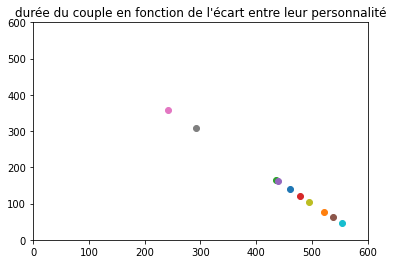

In [71]:
coordonees1(10, 100)

In [113]:
def duree(f,h):
    l = []
    dist_tot = dist_envie(f,h) + dist_moyenne(f,h) + dist_nb_relation(f,h) + dist_age(f,h) + dist_caract(f,h)
    l.append(dist_tot)
    temp = 600 - dist_tot
    res = random.randint(0, temp)
    
    l.append(res)
    return l

In [114]:
def coordonees(nb_tirage, taille): #on rentre le nombre de tirages qu'on souhaite faire et la taille de la liste de départ
    f = creation(taille)
    #duo = meeting()
    #l = duree(duo[0], duo[1])    
    i=0
    plt.title("durée du couple en fonction de l'écart entre leur personnalité")
    plt.axis([0,600, 0, 600])
    # définie l'échelle du graphe
    while i < nb_tirage:
        duo = meeting()
        l = duree(duo[0], duo[1]) 
        x=l[1]
        y=l[0]
        i += 1
         
        plt.scatter(x,y)
        #plt.plot(x,y, color = 'r')
    plt.show 

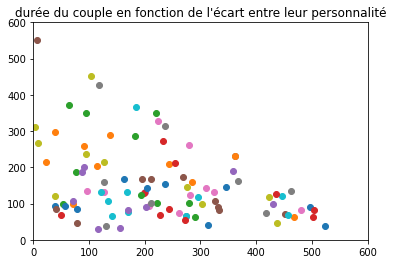

In [119]:
coordonees(100, 100)

In [75]:
#res = dist_tot/3*random.randint(1,30)
#plt.axis([0,600, 0, 600])